In [1]:
import numpy as np

import logging 

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

import seaborn as sns
sns.set_context('notebook', font_scale=1.5)

import pandas as pd

%matplotlib inline
plt.rcParams['figure.figsize'] = 10, 6  # that's default image size for this interactive session
plt.rcParams['axes.formatter.useoffset'] = False

In [2]:
from imucapture.ic_process import Ic_process, eul2rotm
from imucapture.ic_data import Ic_data
from imucapture.ic_get_basis import Ic_get_basis

In [3]:
logger = logging.getLogger()
logger.setLevel(logging.DEBUG)

In [8]:
timescale = 1.0e9

# Calibrate

In [25]:
calibdata = Ic_data()
calibdata.load_hdf5_file("/Users/etytel01/Documents/Acceleration/rawdata/Cassandra's Fish Data/BG17TrialH5s/calib001b.h5",
                         root_group='/data', accelerometer_group='Accel', gyroscope_group='Gyro', time_group='t')

DEBUG:root:Loaded 2 IMUs


True

Show raw data

len(t) = 6662
len(acc1) = 6662
len(acc1) = 6662
len(acc1) = 6662


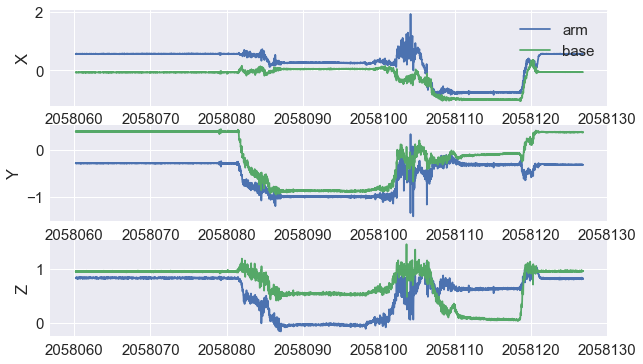

In [26]:
fig, ax = plt.subplots(3)

t = np.array(calibdata.imu_data['timestamps'])/timescale
# t[t == 0] = np.NaN

print("len(t) = {}".format(len(t)))

for acc1, gyro1, ax1 in zip(calibdata.imu_data['imus'][0]['accel'], calibdata.imu_data['imus'][0]['gyro'], ax):
    print("len(acc1) = {}".format(len(acc1)))
    ax1.plot(t, np.array(acc1), label='arm')

for acc1, gyro1, ax1 in zip(calibdata.imu_data['imus'][1]['accel'], calibdata.imu_data['imus'][1]['gyro'], ax):
    ax1.plot(t, np.array(acc1), label='base')

ax[0].set_ylabel('X')
ax[1].set_ylabel('Y')
ax[2].set_ylabel('Z')
ax[0].legend()

plt.show()

In [24]:
t[-20:]

array([ 2058126.60712091,  2058126.61710882,  2058126.62710979,
        2058126.63711356,  2058126.64711266,  2058126.65711021,
        2058126.66711305,  2058126.67711775,  2058126.68711063,
        2058126.69711254,  2058126.70710884,  2058126.71710608,
        2058126.72717671,  2058126.73711238,  2058126.74711241,
        2058126.75711307,  2058126.76710876,  2058126.77720707,
        2058126.78711349,        0.        ])